# Flight Price Prediction


# Problem Statement:


Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.



Size of training set: 10683 records

Size of test set: 2671 records

# FEATURES:


Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket.

# Importing Required Libraries


In [1]:
# importing project dependencies:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing train ans set data from the excel files and storing them as Dataframes.
train_set = pd.read_excel('Data_Train.xlsx')
test_set = pd.read_excel('Test_set.xlsx')

In [4]:
train_set.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
test_set.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
train_set.shape


(10683, 11)

In [7]:
test_set.shape


(2671, 10)

In [8]:
# info on the datatypes 
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
test_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [10]:
# description od both the datasets


In [11]:
train_set.describe()


,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [12]:
train_set.describe(include='all')


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [13]:
test_set.describe()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [14]:
# checking for missing data in both of the sets.


In [15]:
train_set.isna().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [16]:
test_set.isna().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [17]:
# correlatioon check


In [18]:
train_set.corr()


,Price
Price,1.0


In [19]:
test_set.corr()


""


The train and test are in 2 different excel files.


The train set have more than 10,000 data samples and the test set have some above 2,600.


There are only 2 samples with missing data in the train set and no missing data is found in the dest set.


There are no numerical feautures in the dataset, just the target variable Price is a numberical column.


In [22]:
df = train_set.append(test_set)


In [23]:
df.shape


(13354, 11)

In [24]:
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [25]:
df.tail()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [26]:
df.sample(5)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10136,Jet Airways,24/03/2019,Kolkata,Banglore,CCU → BOM → BLR,13:55,18:10 25 Mar,28h 15m,1 stop,No info,14231.0
8902,IndiGo,27/03/2019,Delhi,Cochin,DEL → HYD → MAA → COK,08:35,21:20,12h 45m,2 stops,No info,6494.0
4289,IndiGo,3/06/2019,Delhi,Cochin,DEL → HYD → COK,08:35,16:10,7h 35m,1 stop,No info,6442.0
2091,GoAir,21/04/2019,Delhi,Cochin,DEL → HYD → COK,07:30,13:35,6h 5m,1 stop,No info,NaN
9034,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,16:00,04:25 07 Jun,12h 25m,1 stop,No info,14714.0


In [27]:
# Converting Date OF Journey into Day, Date and Month of Journey

df['Journey_Day'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.day
df['Journey_Month'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.month
df['weekday']= pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.weekday

In [28]:
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,6
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,6
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,4


In [29]:
# drop the data of journey column as therequired features are extracted.
df.drop(labels='Date_of_Journey', axis=1, inplace=True)

In [30]:
df.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,4


In [31]:
#Convertig Duration into minutes


In [32]:
df.Duration


0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
         ...   
2666    23h 55m
2667     2h 35m
2668     6h 35m
2669    15h 15m
2670    14h 20m
Name: Duration, Length: 13354, dtype: object

In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Journey_Day      13354 non-null  int64  
 11  Journey_Month    13354 non-null  int64  
 12  weekday          13354 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 1.4+ MB


In [34]:
import re

df['Mintues'] = df.Duration.apply(lambda x: x[-3:-1])

df.Duration = df.Duration.apply(lambda x: int(re.findall('\d+',x[:2])[0])*60)

df.Duration = df.Mintues.astype('int') + df.Duration

In [35]:
df.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday,Mintues
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897.0,24,3,6,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662.0,1,5,2,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1159,2 stops,No info,13882.0,9,6,6,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218.0,12,5,6,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302.0,1,3,4,45


In [36]:
df.drop(labels='Mintues', axis=1, inplace=True)


In [37]:
df.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897.0,24,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662.0,1,5,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1159,2 stops,No info,13882.0,9,6,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218.0,12,5,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302.0,1,3,4


In [39]:
#Extracting whether its a morning,evening,night or afternoon flight from departure time & arrival time of the flight
def deparrtime(x):
    x=x.strip()
    tt=(int)(x.split(':')[0])
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x
df['Dep_Time']=df['Dep_Time'].apply(deparrtime)
df['Arrival_Time']=df['Arrival_Time'].apply(deparrtime)

In [40]:
df.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,Night,Night,170,non-stop,No info,3897.0,24,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,Morning,Afternoon,445,2 stops,No info,7662.0,1,5,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,Morning,Night,1159,2 stops,No info,13882.0,9,6,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,Evening,Night,325,1 stop,No info,6218.0,12,5,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,Evening,Night,285,1 stop,No info,13302.0,1,3,4


In [41]:
# Converting total_stops to 0,1,2,3 respectively
def stops(x):
    if(x=='non-stop'):
        x=str(0)
    else:
        str(x).strip()
        stps=str(x).split(' ')[0]
        x=stps
    return x
df['Total_Stops']=df['Total_Stops'].apply(stops)



pd.options.mode.chained_assignment = None 
for i in range(df.shape[0]):
    if(df.iloc[i]['Additional_Info']=='No info'):
        df.iloc[i]['Additional_Info']='No Info' 

In [42]:
df.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,Night,Night,170,0,No info,3897.0,24,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,Morning,Afternoon,445,2,No info,7662.0,1,5,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,Morning,Night,1159,2,No info,13882.0,9,6,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,Evening,Night,325,1,No info,6218.0,12,5,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,Evening,Night,285,1,No info,13302.0,1,3,4


In [43]:
# mapping the month number with their respective names.


df["Journey_Month"]=df["Journey_Month"].replace({3:"March",4:"April",5:"May",6:"June"})

In [44]:
df.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,Night,Night,170,0,No info,3897.0,24,March,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,Morning,Afternoon,445,2,No info,7662.0,1,May,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,Morning,Night,1159,2,No info,13882.0,9,June,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,Evening,Night,325,1,No info,6218.0,12,May,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,Evening,Night,285,1,No info,13302.0,1,March,4


In [45]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  int64  
 7   Total_Stops      13354 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Journey_Day      13354 non-null  int64  
 11  Journey_Month    13354 non-null  object 
 12  weekday          13354 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 1.4+ MB


In [46]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  int64  
 7   Total_Stops      13354 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Journey_Day      13354 non-null  int64  
 11  Journey_Month    13354 non-null  object 
 12  weekday          13354 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 1.4+ MB


In [47]:
df1 =df.copy() 


In [48]:
# Dropping Redundant Columns

df=df.drop(['Arrival_Time'], axis=1) #this columns has no such effect on fare price

df=df.drop(['Route'], axis=1) #we don't need it as we already have total_stops

In [49]:
df.head()


,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,170,0,No info,3897.0,24,March,6
1,Air India,Kolkata,Banglore,Morning,445,2,No info,7662.0,1,May,2
2,Jet Airways,Delhi,Cochin,Morning,1159,2,No info,13882.0,9,June,6
3,IndiGo,Kolkata,Banglore,Evening,325,1,No info,6218.0,12,May,6
4,IndiGo,Banglore,New Delhi,Evening,285,1,No info,13302.0,1,March,4


# Correlation


In [51]:
df.corr()


,Duration,Price,Journey_Day,weekday
Duration,1.000000,0.506607,-0.022909,-0.008226
Price,0.506607,1.000000,-0.153738,0.051613
Journey_Day,-0.022909,-0.153738,1.000000,-0.082577
weekday,-0.008226,0.051613,-0.082577,1.000000


<AxesSubplot:>

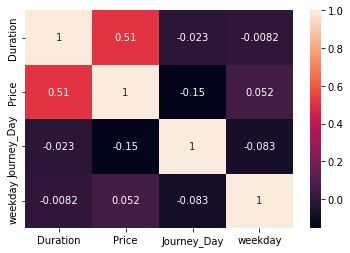

In [52]:
sns.heatmap(df.corr(),annot=True)


# Univariate Analysis


In [53]:
# helper function
def figure_this_size(x,y):
    return plt.figure(figsize=(x,y))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

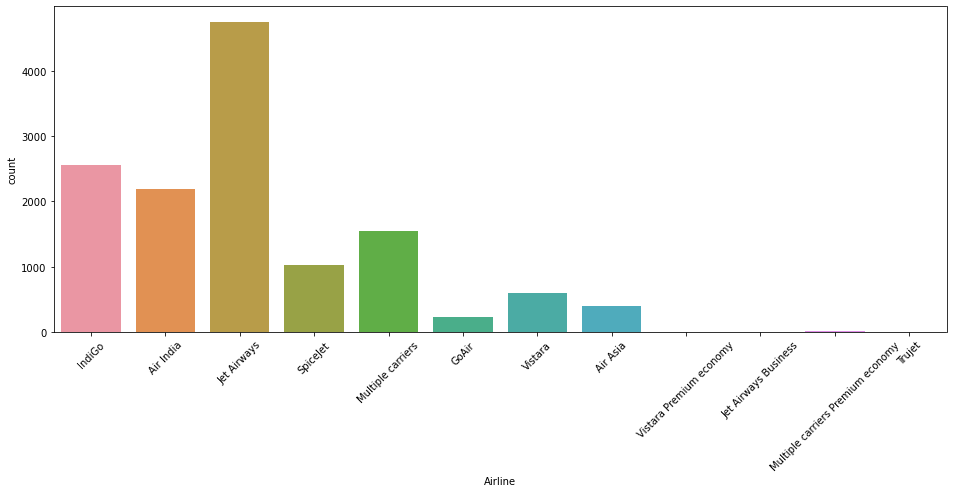

In [54]:
figure_this_size(16,6)
sns.countplot(df.Airline)
plt.xticks(Rotation=45)

In [55]:
df.Airline.value_counts()


Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [56]:
df.shape


(13354, 11)

In [57]:
#Jet Airways, Indigo & Air India Covers More than 70% of the Airlines


In [58]:
df.Source.value_counts()


Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='count'>

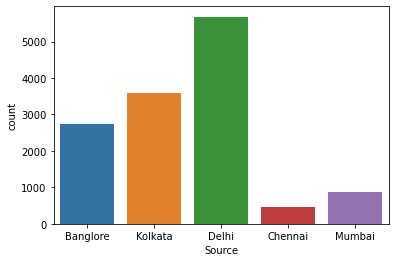

In [59]:
sns.countplot(df.Source)


<AxesSubplot:xlabel='Destination', ylabel='count'>

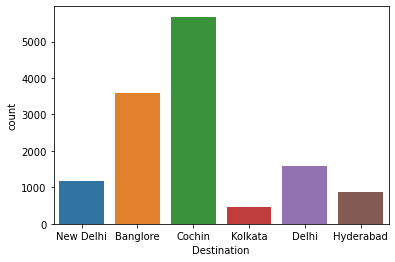

In [60]:
sns.countplot(df.Destination)


In [61]:
# From Looking at Source & Destination, it seems like people from Delhi Source, Kolkata are Going to Cochin & banglore for rnjoying vacations.
# For rest, we can say that either people are going back to their hometown.

<AxesSubplot:xlabel='Dep_Time', ylabel='count'>

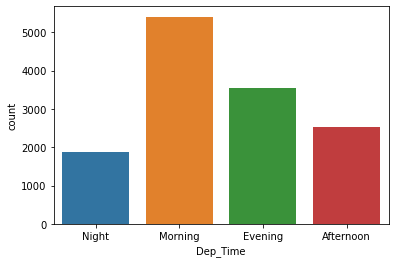

In [62]:
sns.countplot(df.Dep_Time)


In [63]:
# People are not prefering Night Travel! We may find that reason in bivariate analysis


<AxesSubplot:xlabel='Duration', ylabel='count'>

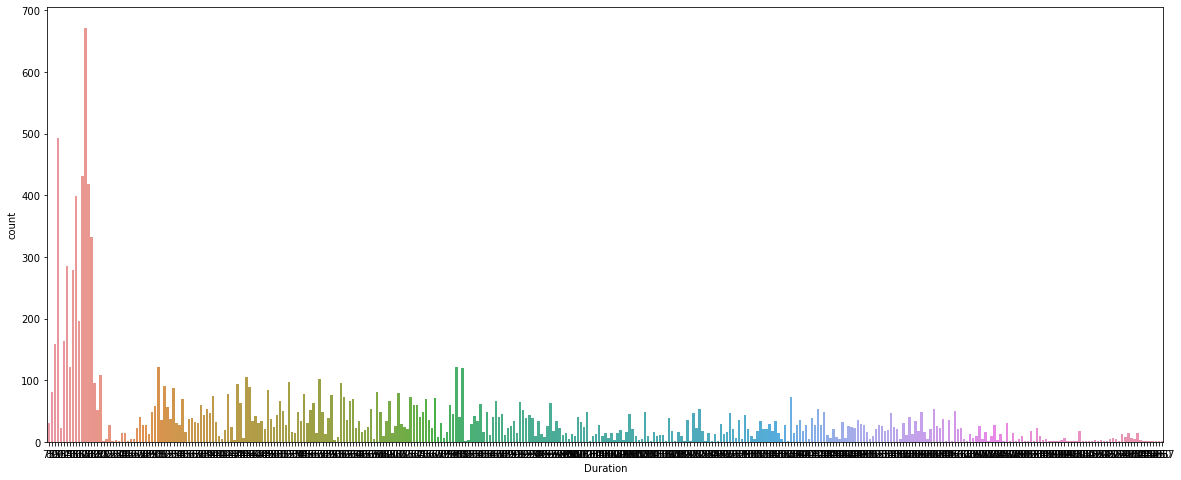

In [64]:
figure_this_size(20,8)
sns.countplot(df.Duration)

In [65]:
df.Duration.value_counts()


170     672
90      493
165     432
175     418
155     399
       ... 
2525      1
1975      1
1890      1
2120      1
1945      1
Name: Duration, Length: 367, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

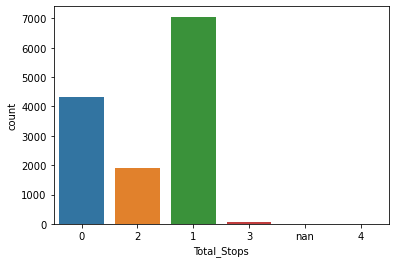

In [66]:
sns.countplot(df.Total_Stops)



In [67]:
df.Total_Stops.value_counts()


1      7056
0      4340
2      1899
3        56
4         2
nan       1
Name: Total_Stops, dtype: int64

In [68]:
#More than 50% of people prefers 1stop Travel


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

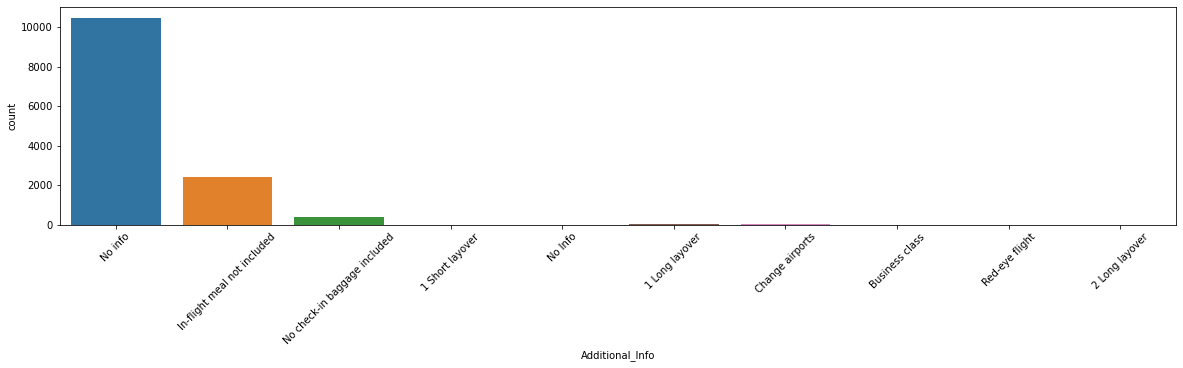

In [69]:
figure_this_size(20,4)
sns.countplot(df.Additional_Info)
plt.xticks(Rotation=45)

In [70]:
df.Additional_Info.value_counts()


No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [71]:
# Around 78% rows of Additional_Info has no info, that means either the data is misssing or the travellers dont take additional services


<AxesSubplot:xlabel='Journey_Month', ylabel='count'>

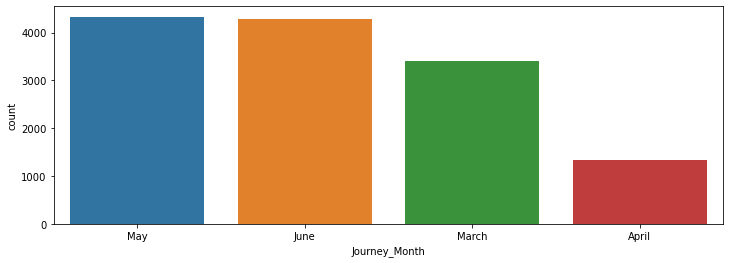

In [72]:
figure_this_size(12,4)
sns.countplot(df.Journey_Month,order=df.Journey_Month.value_counts().index)

In [73]:
#Least amount of the ticket bookings had been done in the month of April bevause in this month students have their final exams & also the offives have thie Q! End


<AxesSubplot:xlabel='weekday', ylabel='count'>

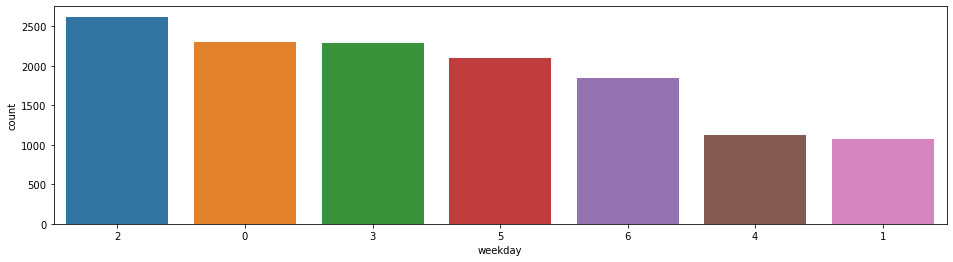

In [75]:
figure_this_size(16,4)
sns.countplot(df.weekday,order=df.weekday.value_counts().index)

# Multi-variate Analysis


In [76]:
df.head()


,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,170,0,No info,3897.0,24,March,6
1,Air India,Kolkata,Banglore,Morning,445,2,No info,7662.0,1,May,2
2,Jet Airways,Delhi,Cochin,Morning,1159,2,No info,13882.0,9,June,6
3,IndiGo,Kolkata,Banglore,Evening,325,1,No info,6218.0,12,May,6
4,IndiGo,Banglore,New Delhi,Evening,285,1,No info,13302.0,1,March,4


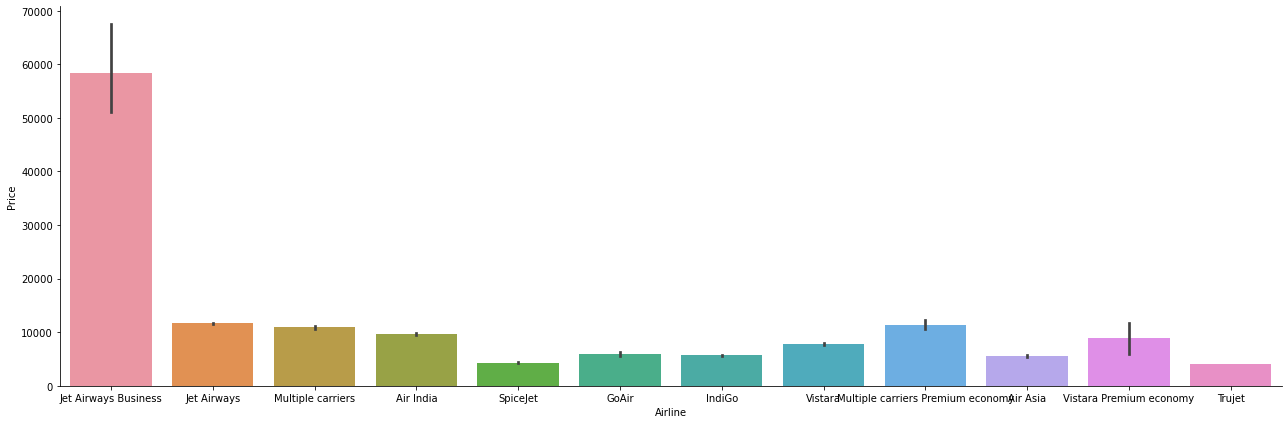

In [78]:
# AIRLINE vs PRICE
sns.catplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

In [79]:
#Jet Airways Business Airline has the highest price apart from the first airline almost all are having similar median, maybe because of their services that they provide to their customers


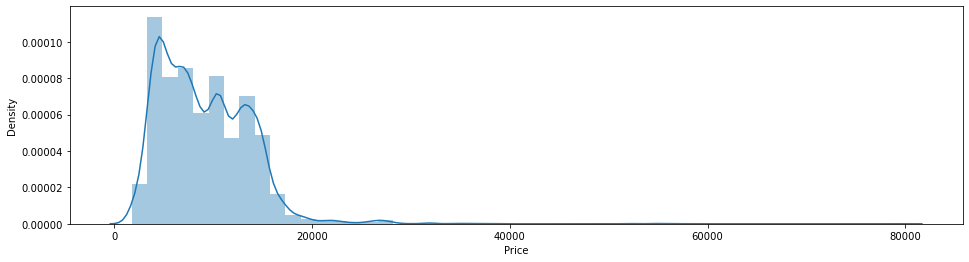

In [80]:
# Looking at Price distribution
figure_this_size(16,4)
sns.distplot(df['Price'])
plt.show()

In [81]:
df.groupby(['Journey_Month']).mean()

,Duration,Price,Journey_Day,weekday
Journey_Month,,,,
April,380.868124,5770.847081,11.004521,2.202713
June,650.598927,8828.796134,12.178021,3.055063
March,689.081184,10673.205580,13.775791,3.514361
May,681.210672,9127.247548,15.016632,2.592285


In [82]:
# We see that the average fare price is highest the month of March , this can be because people usually book the fights 2-3 months prior to their date of journey which leads to higher demand and hence higher fare prices.(since the count of tickets booked for travelling in May is the most, prior bookings are done in March)


In [83]:
df.groupby(['weekday']).mean()


,Duration,Price,Journey_Day
weekday,,,
0,616.146077,8499.530811,13.653663
1,654.521375,9026.149597,17.436803
2,686.256009,9277.514190,12.080122
3,700.318441,8931.379367,14.586071
4,470.275647,9717.996700,14.067797
5,636.006676,8972.905389,12.087744
6,654.343970,9525.508820,12.150892


In [84]:
# we can say that the highest prices are on Friday-4 while lowest being on Monday-0.
# That may be because this is when airlines start raising prices to make up for the lower prices before and also because weekdays are off for most peo

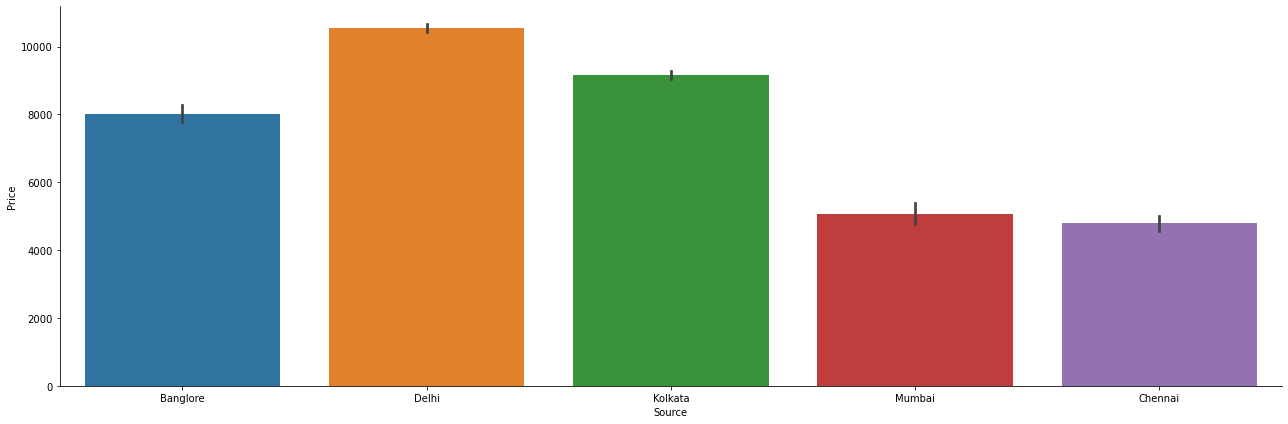

In [85]:
# Source vs PRICE
sns.catplot(y='Price',x='Source',data= df.sort_values('Price',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

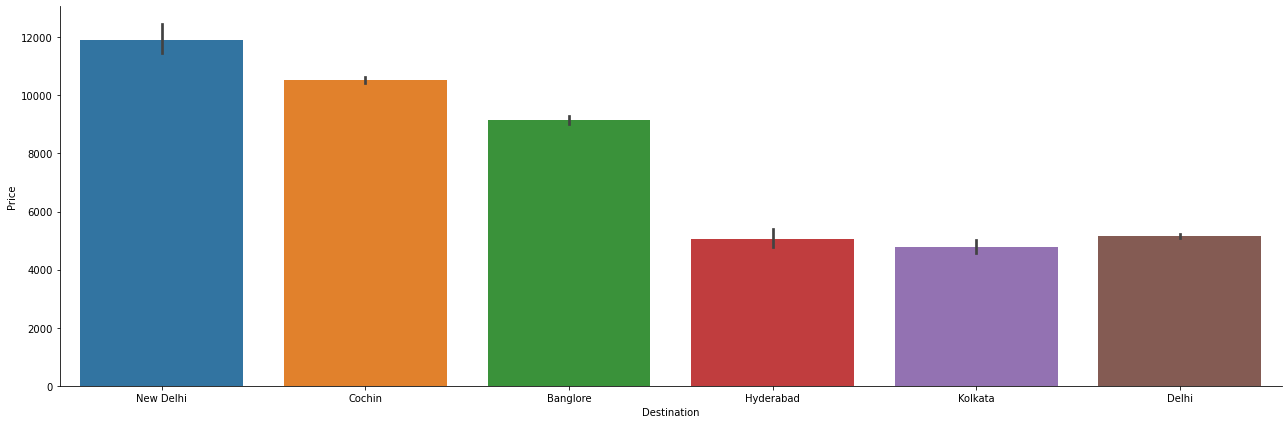

In [86]:
# Destination vs PRICE
sns.catplot(y='Price',x='Destination',data= df.sort_values('Price',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

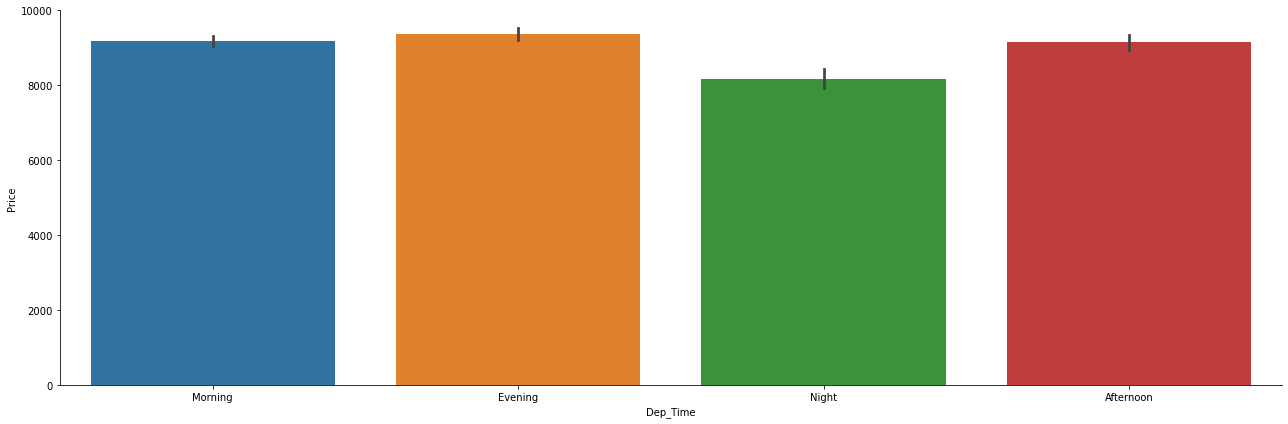

In [87]:
# Destination vs PRICE
sns.catplot(y='Price',x='Dep_Time',data= df.sort_values('Price',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

In [88]:
# Early Morning flights are always cheaper and so are night flight prices.
# Evening flight fares are expensive due to more demand and is the most convenient time to tarvel for most people.

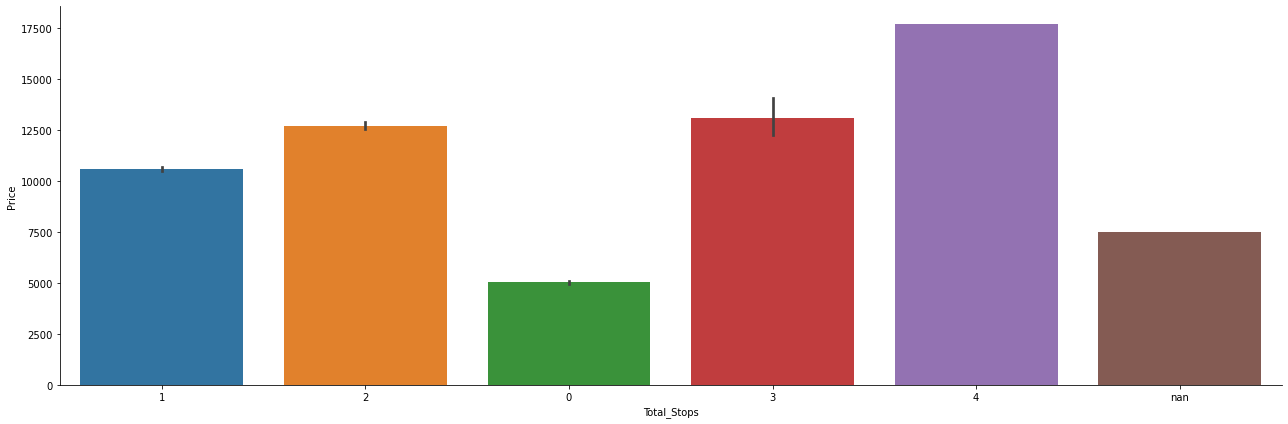

In [89]:
# Total_Stops Vs Price
sns.catplot(y='Price',x='Total_Stops',data= df.sort_values('Price',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

In [90]:
# As a direct/non-stop flight is accounting for fare of only one flight for a trip, its average fair is the least. As the no. of stops/layovers increase, the fare price goes up accounting for no. of flights and due to other resources being used up for the same.


We get p-value < 0.05, hence we say the target variable(Price) and continuous independent variable(Duration) are correlated. r = 0.51 says they are moderately related.


In [91]:
df

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,170,0,No info,3897.0,24,March,6
1,Air India,Kolkata,Banglore,Morning,445,2,No info,7662.0,1,May,2
2,Jet Airways,Delhi,Cochin,Morning,1159,2,No info,13882.0,9,June,6
3,IndiGo,Kolkata,Banglore,Evening,325,1,No info,6218.0,12,May,6
4,IndiGo,Banglore,New Delhi,Evening,285,1,No info,13302.0,1,March,4
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,Evening,1435,1,No info,NaN,6,June,3
2667,IndiGo,Kolkata,Banglore,Afternoon,155,0,No info,NaN,27,March,2
2668,Jet Airways,Delhi,Cochin,Night,395,1,No info,NaN,6,March,2
2669,Air India,Delhi,Cochin,Night,915,1,No info,NaN,6,March,2


In [92]:
df.Additional_Info.value_counts()/len(df) * 100


No info                         78.575708
In-flight meal not included     18.166841
No check-in baggage included     2.965404
1 Long layover                   0.149768
Change airports                  0.059907
Business class                   0.037442
No Info                          0.022465
1 Short layover                  0.007488
Red-eye flight                   0.007488
2 Long layover                   0.007488
Name: Additional_Info, dtype: float64

In [93]:
# let's drop the additional info columns as  more than 75 perecent of its values are missing.


In [94]:
df.drop('Additional_Info',1,inplace=True)


In [95]:
df.head()


,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,170,0,3897.0,24,March,6
1,Air India,Kolkata,Banglore,Morning,445,2,7662.0,1,May,2
2,Jet Airways,Delhi,Cochin,Morning,1159,2,13882.0,9,June,6
3,IndiGo,Kolkata,Banglore,Evening,325,1,6218.0,12,May,6
4,IndiGo,Banglore,New Delhi,Evening,285,1,13302.0,1,March,4


# One Hot Encoding


In [96]:
# sepearting the categorical and the numrical variables
num_var =df.select_dtypes(include=['float64'])

cat_var = df.select_dtypes(include=['object'])

In [97]:
cat_var


,Airline,Source,Destination,Dep_Time,Total_Stops,Journey_Month
0,IndiGo,Banglore,New Delhi,Night,0,March
1,Air India,Kolkata,Banglore,Morning,2,May
2,Jet Airways,Delhi,Cochin,Morning,2,June
3,IndiGo,Kolkata,Banglore,Evening,1,May
4,IndiGo,Banglore,New Delhi,Evening,1,March
...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,Evening,1,June
2667,IndiGo,Kolkata,Banglore,Afternoon,0,March
2668,Jet Airways,Delhi,Cochin,Night,1,March
2669,Air India,Delhi,Cochin,Night,1,March


In [98]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


In [99]:
le=LabelEncoder()
for column in df.columns:
    if df[column].dtype==object:
        df[column]=le.fit_transform(df[column])

In [100]:
df


,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,weekday
0,3,0,5,3,170,0,3897.0,24,2,6
1,1,3,0,2,445,2,7662.0,1,3,2
2,4,2,1,2,1159,2,13882.0,9,1,6
3,3,3,0,1,325,1,6218.0,12,3,6
4,3,0,5,1,285,1,13302.0,1,2,4
...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1,1435,1,NaN,6,1,3
2667,3,3,0,0,155,0,NaN,27,2,2
2668,4,2,1,3,395,1,NaN,6,2,2
2669,1,2,1,3,915,1,NaN,6,2,2


In [101]:
# respliting the train ans test again afer the data processing is done.


In [102]:
df_train = df[~df.Price.isna()]


In [103]:
df_test = df[df.Price.isna()]


In [104]:
df_train.shape


(10683, 10)

In [105]:
df_test.shape


(2671, 10)

In [106]:
df_train


,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,weekday
0,3,0,5,3,170,0,3897.0,24,2,6
1,1,3,0,2,445,2,7662.0,1,3,2
2,4,2,1,2,1159,2,13882.0,9,1,6
3,3,3,0,1,325,1,6218.0,12,3,6
4,3,0,5,1,285,1,13302.0,1,2,4
...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,1,150,0,4107.0,9,0,1
10679,1,3,0,1,155,0,4145.0,27,0,5
10680,4,0,2,2,183,0,7229.0,27,0,5
10681,10,0,5,0,160,0,12648.0,1,2,4


In [107]:
df_test


,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,weekday
0,4,2,1,1,655,1,NaN,6,1,3
1,3,3,0,2,244,1,NaN,12,3,6
2,4,2,1,1,1425,1,NaN,21,3,1
3,6,2,1,2,793,1,NaN,21,3,1
4,0,0,2,3,170,0,NaN,24,1,0
...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1,1435,1,NaN,6,1,3
2667,3,3,0,0,155,0,NaN,27,2,2
2668,4,2,1,3,395,1,NaN,6,2,2
2669,1,2,1,3,915,1,NaN,6,2,2


In [108]:
## addressing the outliers from the train set


In [109]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Airline        13354 non-null  int32  
 1   Source         13354 non-null  int32  
 2   Destination    13354 non-null  int32  
 3   Dep_Time       13354 non-null  int32  
 4   Duration       13354 non-null  int64  
 5   Total_Stops    13354 non-null  int32  
 6   Price          10683 non-null  float64
 7   Journey_Day    13354 non-null  int64  
 8   Journey_Month  13354 non-null  int32  
 9   weekday        13354 non-null  int64  
dtypes: float64(1), int32(6), int64(3)
memory usage: 1.3 MB


In [110]:
## reoving outliers from the train dataset.


In [111]:
scores = np.abs(zscore(df_train))
t = 3
np.where(scores<3)

(array([    0,     0,     0, ..., 10682, 10682, 10682], dtype=int64),
 array([0, 1, 2, ..., 7, 8, 9], dtype=int64))

In [112]:
new_df_train = df_train[(scores<3).all(axis=1)]
print(df_train.shape)
print(new_df_train.shape)

(10683, 10)
(10494, 10)


# X and y split


In [114]:
X = new_df_train.drop('Price',1)
y = new_df_train['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10494, dtype: float64

# Train and Validation split


In [115]:
from sklearn.model_selection import train_test_split


In [116]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=42)


In [117]:
# checking the shape
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((7345, 9), (7345,), (3149, 9), (3149,))

# Building the model


In [119]:
# import training dependencies
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [120]:
# import the evaluation metrics dependenices
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

In [121]:
# helper function
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_val)
    print('MSE:',mean_squared_error(y_val,y_preds))
    print('R2_Score',r2_score(y_val,y_preds))  

In [122]:
# try1: Linear Regression
train_n_ret_scores(LinearRegression())

MSE: 7683953.0404964145
R2_Score 0.518182666528048


In [123]:
# try2: Ridge Regression
train_n_ret_scores(Ridge())

MSE: 7684264.940547222
R2_Score 0.5181631090359605


In [124]:
# try3: Lasso Regression
train_n_ret_scores(Lasso(alpha=0.00003))

MSE: 7683953.047223301
R2_Score 0.518182666106243


In [125]:
# ElasticNet
train_n_ret_scores(ElasticNet(alpha=0.0001))

MSE: 7684067.3823990105
R2_Score 0.5181754967925847


In [126]:
# try4: SVR
train_n_ret_scores(SVR(kernel='linear'))

MSE: 9975185.547423374
R2_Score 0.3745124057867768


In [127]:
# try5: Decision Trees
train_n_ret_scores(DecisionTreeRegressor(criterion='mse'))

MSE: 5709588.144878314
R2_Score 0.641983947495518


In [128]:
# try6: Random Forest
train_n_ret_scores(RandomForestRegressor())

MSE: 3554917.775343814
R2_Score 0.7770911672414977


In [129]:
# try9: Adaboost with DC

train_n_ret_scores(AdaBoostRegressor(base_estimator=DecisionTreeRegressor()))

MSE: 3934293.1568081924
R2_Score 0.7533026779419506


In [130]:
# try8: Adaboost

train_n_ret_scores(AdaBoostRegressor())

MSE: 5859352.776101268
R2_Score 0.6325930526157658


In [131]:
# try 3 : KNN
train_n_ret_scores(KNeighborsRegressor())

MSE: 6469650.467869164
R2_Score 0.5943247283662597


In [132]:
#let's create the models dataframe
models = [LinearRegression(),Ridge(alpha=0.001),Lasso(alpha=0.0003),ElasticNet(alpha=0.0001),SVR(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(base_estimator=LinearRegression())]
model_names = 'Linear Ridge Lasso ElasticNet SVR Descision_Tree Random_Forest Gradient_Boost Ada_Boost'.split()
models_df = pd.DataFrame(columns=['Model','MSE','R2','meanCV'])
for model,model_names in zip(models,model_names):
    print(model)
    
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_val)
    
    mse = mean_squared_error(y_val,y_preds)
    r2 = r2_score(y_val,y_preds)
    avgCV = np.mean(cross_val_score(model,X,y,scoring='r2'))
    
    
    models_df = models_df.append({'Model':model_names,'MSE':mse,'R2':r2,'meanCV':avgCV},ignore_index=True)

LinearRegression()
Ridge(alpha=0.001)
Lasso(alpha=0.0003)
ElasticNet(alpha=0.0001)
SVR()
DecisionTreeRegressor()
RandomForestRegressor()
GradientBoostingRegressor()
AdaBoostRegressor(base_estimator=LinearRegression())


In [133]:
models_df


,Model,MSE,R2,meanCV
0,Linear,7.683953e+06,0.518183,0.507452
1,Ridge,7.683953e+06,0.518183,0.507452
2,Lasso,7.683953e+06,0.518183,0.507452
3,ElasticNet,7.684067e+06,0.518175,0.507452
4,SVR,1.284876e+07,0.194327,0.217152
5,Descision_Tree,5.632163e+06,0.646839,0.665833
6,Random_Forest,3.560039e+06,0.776770,0.774494
7,Gradient_Boost,3.596596e+06,0.774478,0.763738
8,Ada_Boost,8.516038e+06,0.466007,0.473408


Random Forest Regressor is giving us the best crossval reults.


In [134]:
best_model = RandomForestRegressor()


In [135]:
best_model.fit(X_train,y_train)


RandomForestRegressor()

In [136]:
best_model.score(X_val,y_val)


0.7761832259512064

# Predicting on the test set


In [137]:
df_test.head()


,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,weekday
0,4,2,1,1,655,1,NaN,6,1,3
1,3,3,0,2,244,1,NaN,12,3,6
2,4,2,1,1,1425,1,NaN,21,3,1
3,6,2,1,2,793,1,NaN,21,3,1
4,0,0,2,3,170,0,NaN,24,1,0


In [138]:
df_test.drop('Price',1,inplace=True)


In [139]:
test_prediction = best_model.predict(df_test)


# Saving to csv


In [140]:
pd.DataFrame(test_prediction,columns=['Price']).to_csv('Test_results')


# Saving the model


In [141]:
import joblib
joblib.dump(best_model,'flight_price.pkl')

['flight_price.pkl']